# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [6]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [39]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=['Unknown', 'UNKNOWN'])
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [40]:
df.shape

(30000, 15)

In [41]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [42]:
#Each row is a dog in NYC. 'Animal Birth' is the DOB of the dog and 'Vaccinated' is whether the dog is vaccinated or not.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [43]:
#Top 10 oldest dogs in NYC.
#Most common breeds of dogs.
#Which zipcode has the most dog owners.
#What percentage of dogs are vaccinated.

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

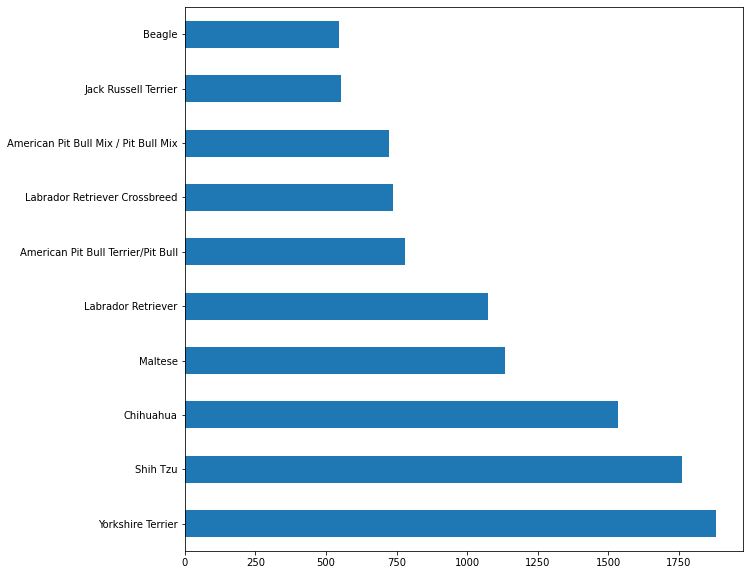

In [44]:
df['Primary Breed'].value_counts().sort_values(ascending=False).head(10).plot(figsize=(10, 10), kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [ ]:
#Already did it.

## What are the most popular dog names?

In [48]:
df['Animal Name'].value_counts()

Max               202
Bella             193
Charlie           172
Lola              146
Rocky             140
                 ... 
Yuri  Cancel        1
FIBI                1
Maxwell Miller      1
Scooter             1
LUNA ANGELINA       1
Name: Animal Name, Length: 13719, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [73]:
max_maxwell = df[df['Animal Name'].isin(["Max", "Maxwell"])]
max_maxwell['Animal Name'].value_counts()

Max        202
Maxwell     11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [75]:
df[df['Guard or Trained'].isna()]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,11216,unknown,F,American Pit Bull Terrier/Pit Bull,NaN,Black,White,NaN,2015-05-01,Yes,NaN,No,2015-08-22 18:12:19.780,2015-08-22,2016-08-22
29984,10021,KILO,M,German Shepherd Dog,NaN,Black,Cream,Tan,2007-02-01,Yes,NaN,Yes,2015-08-22 18:16:11.127,2015-08-22,2016-09-24
29989,10462,toby,M,Shih Tzu,NaN,Cream,Black,NaN,2006-03-01,No,NaN,Yes,2015-08-22 18:30:48.360,2015-08-22,2016-08-22
29994,10003,Beatrix Fox,F,Chihuahua,NaN,Fawn,Brown,White,2012-08-01,Yes,NaN,Yes,2015-08-22 18:52:08.887,2015-08-22,2016-08-22


## What are the actual numbers?

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

## What are the top dog breeds for guard dogs? 

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

## What is the most common dog breed in each of the neighborhoods of NYC?

## What breed of dogs are the least likely to be spayed? Male or female?

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

## How many dogs are in each borough? Plot it in a graph.

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?